### **E-commerce is the activity of electronically buying or selling of products on online services or over the Internet.**
**Dataset used is : Global_Superstore.csv**

In [ ]:
# Mounting with google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importing libraries
import pandas
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Importing the dataset
data = pandas.read_csv('/content/gdrive/My Drive/Datasets/Global_Superstore.csv', engine='python')
# Shuffling the dataframe to remove biasness 
data= data.sample(frac= 1)
# Shape of dataset
data.shape

(51290, 24)

In [ ]:
# Viewing 3 rows from dataframe
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
32923,1081,US-2013-125759,12-03-2013,18-03-2013,Standard Class,JE-15475,Jeremy Ellison,Consumer,Santo Domingo,Santo Domingo,Dominican Republic,NaN,LATAM,Caribbean,TEC-MA-10000888,Technology,Machines,"Okidata Phone, White",51.156,3,0.7,-52.8840,4.31,Medium
48246,33721,US-2014-147669,26-12-2014,31-12-2014,Standard Class,SV-20935,Susan Vittorini,Consumer,Fairfield,Ohio,United States,45014.0,US,East,OFF-BI-10000632,Office Supplies,Binders,Satellite Sectional Post Binders,13.023,1,0.7,-10.4184,0.69,Medium
47634,37748,CA-2012-156510,25-09-2012,29-09-2012,Standard Class,EH-13990,Erica Hackney,Consumer,Meriden,Connecticut,United States,6450.0,US,East,OFF-AR-10004930,Office Supplies,Art,Turquoise Lead Holder with Pocket Clip,6.700,1,0.0,2.2110,0.79,High


In [ ]:
# Columns in dataframe
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [ ]:
# Brief information about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 32923 to 3749
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-nu

In [ ]:
# Data Cleaning
# Checking null values
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [ ]:
# Only column 'Postal Code' has null values in it and that too 41296 null values out of 51290 total values. Also it don't have any significance in ML model.
del data['Postal Code']

In [ ]:
# Checking null values again after deleting 'Postal Code' column
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [ ]:
# Checking duplicate values
data.duplicated().sum()

0

In [ ]:
# Number of unique values in dataframe
data.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [ ]:
# Unique values and their count in column 'Category'
data.groupby('Category').size()

Category
Furniture           9876
Office Supplies    31273
Technology         10141
dtype: int64

In [ ]:
# Unique values and their count in column 'Order Priority'
data['Order Priority'].value_counts()

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

In [ ]:
# Description of data
data.describe()

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [ ]:
# Correlation matrix
correlation= data.corr().round(decimals= 3)
correlation
# Sales and Shipping Cost has highest positive correlation of 0.768.

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000,-0.044,-0.173,0.088,-0.019,-0.039
Sales,-0.044,1.000,0.314,-0.087,0.485,0.768
Quantity,-0.173,0.314,1.000,-0.020,0.104,0.273
Discount,0.088,-0.087,-0.020,1.000,-0.316,-0.079
Profit,-0.019,0.485,0.104,-0.316,1.000,0.354
Shipping Cost,-0.039,0.768,0.273,-0.079,0.354,1.000


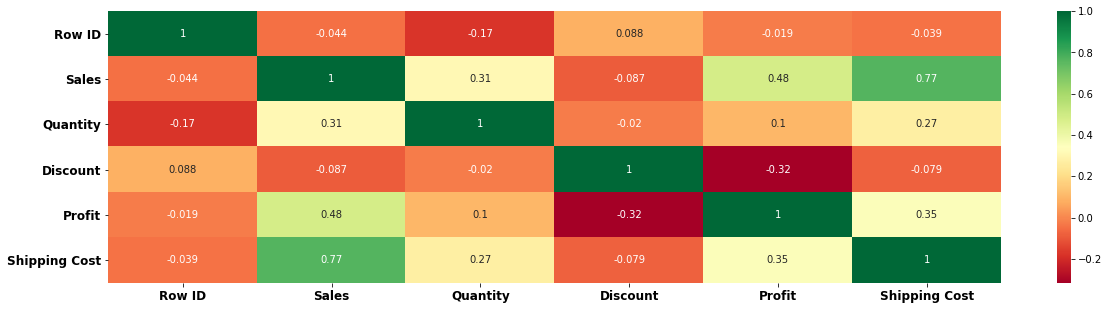

In [ ]:
# Correlation heatmap
plt.figure(figsize= (20, 5))
seaborn.heatmap(correlation, annot= True, cmap= 'RdYlGn')
plt.xticks(fontsize= 12, fontweight= 'bold')
plt.yticks(rotation= 0, fontsize= 12, fontweight= 'bold')
plt.show()

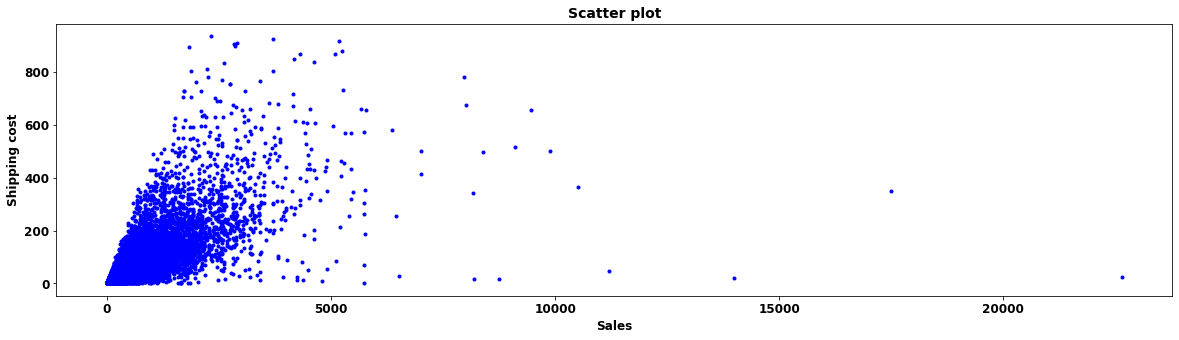

In [ ]:
# Scatter plot between Sales and Shipping Cost
plt.figure(figsize= (20, 5))
plt.scatter(data['Sales'], data['Shipping Cost'], marker= '.', color= 'blue')
plt.xlabel('Sales', fontsize= 12, fontweight= 'bold')
plt.ylabel('Shipping cost', fontsize= 12, fontweight= 'bold')
plt.title('Scatter plot', fontsize= 14, fontweight= 'bold')
plt.xticks(fontsize= 12, fontweight= 'bold')
plt.yticks(fontsize= 12, fontweight= 'bold')
plt.show()

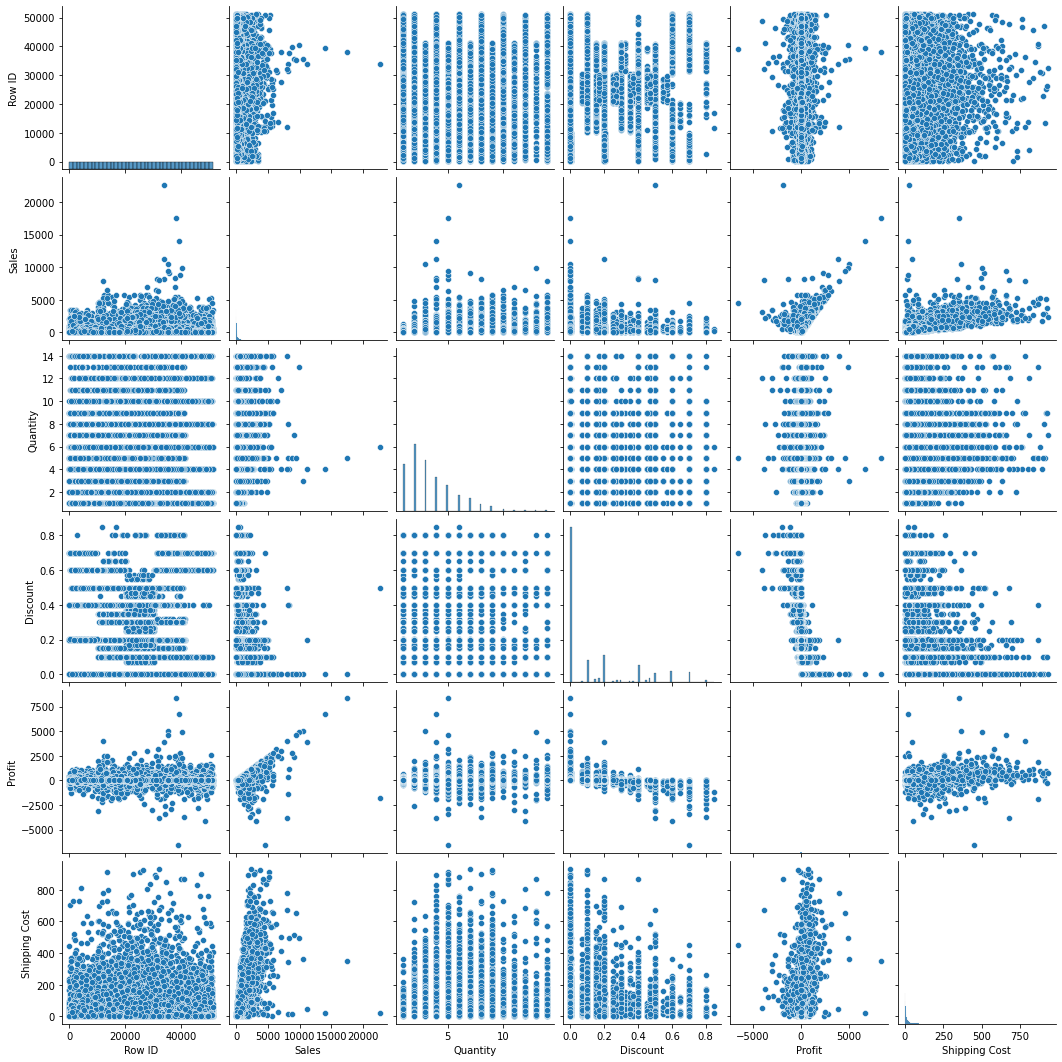

In [ ]:
# Pairplot
seaborn.pairplot(data)
plt.show()

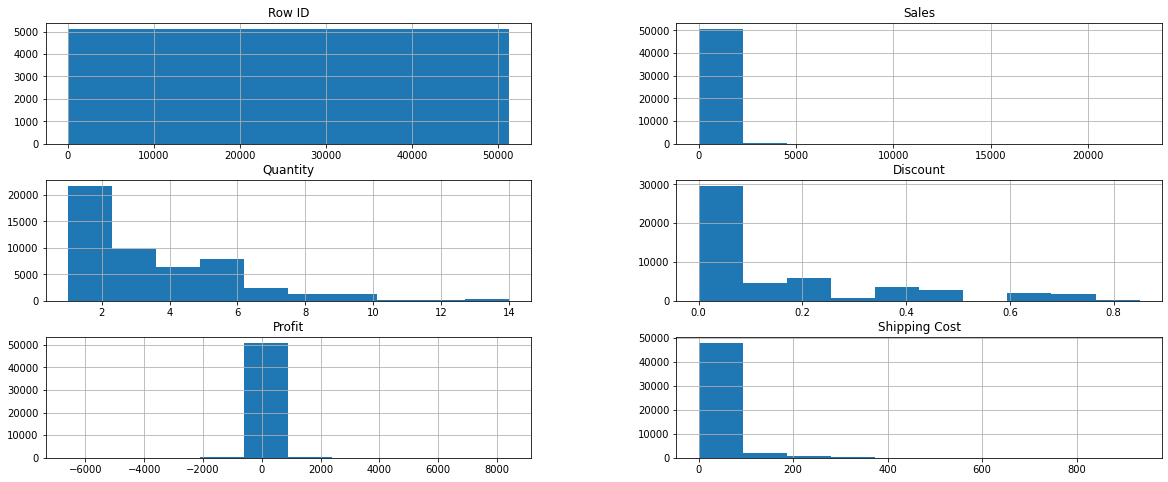

In [ ]:
# Histogram plot
data.hist(figsize= (20, 8))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


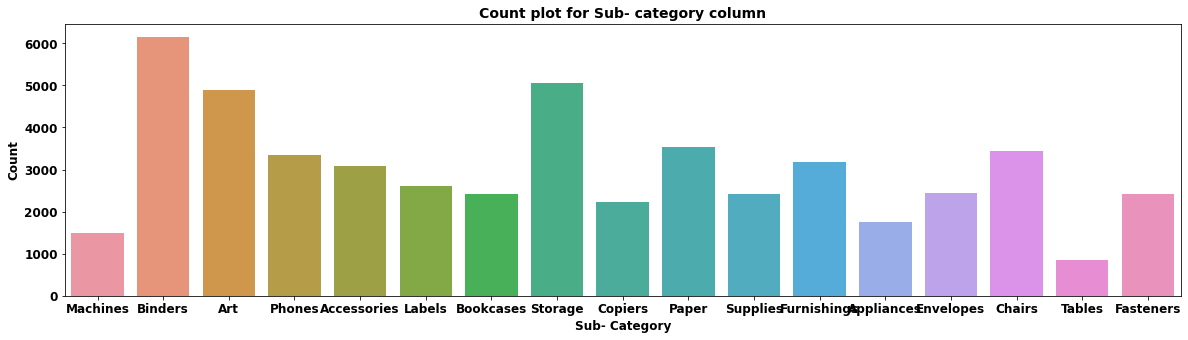

In [ ]:
# Countplot
plt.figure(figsize= (20, 5))
seaborn.countplot(data['Sub-Category'])
plt.xlabel('Sub- Category', fontsize= 12, fontweight= 'bold')
plt.ylabel('Count', fontsize= 12, fontweight= 'bold')
plt.title('Count plot for Sub- category column', fontsize= 14, fontweight= 'bold')
plt.xticks(fontsize= 12, fontweight= 'bold')
plt.yticks(fontsize= 12, fontweight= 'bold')
plt.show()

In [ ]:
# Dividing dataframe into features(Independent) and target(Dependent) parts
features= ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
target= ['Order Priority']
x= data[features]
y= data[target]

In [ ]:
# Dividing features and target parts into training (80 %) and testing (20 %) sets
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 1)
print('Independent training set shape is :', x_train.shape)
print('Independent testing set shape is :', x_test.shape)
print('Dependent training set shape is :', y_train.shape)
print('Dependent testing set shape is :', y_test.shape)

Independent training set shape is : (41032, 5)
Independent testing set shape is : (10258, 5)
Dependent training set shape is : (41032, 1)
Dependent testing set shape is : (10258, 1)


In [ ]:
# Applying Logistic Regression
import warnings
warnings.filterwarnings('ignore') 

lr= LogisticRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
lr_accuracy= ((accuracy_score(y_test, y_pred)) * 100).round(decimals= 3)
print('Training set accuracy acore % is : ', ((accuracy_score(y_train, lr.predict(x_train))) * 100).round(decimals= 3) )
print('Testing set accuracy acore % is : ', lr_accuracy)
print('Confusion matrix is :', '\n', confusion_matrix(y_test, y_pred))
print()
print('Classification report is :', '\n',  classification_report(y_test, y_pred))

Training set accuracy acore % is :  63.238
Testing set accuracy acore % is :  63.658
Confusion matrix is : 
 [[ 136  337    0  344]
 [  41  690    0 2325]
 [   0   77    0  398]
 [   5  201    0 5704]]

Classification report is : 
               precision    recall  f1-score   support

    Critical       0.75      0.17      0.27       817
        High       0.53      0.23      0.32      3056
         Low       0.00      0.00      0.00       475
      Medium       0.65      0.97      0.78      5910

    accuracy                           0.64     10258
   macro avg       0.48      0.34      0.34     10258
weighted avg       0.59      0.64      0.56     10258



In [ ]:
# Applying Decision Tree Classifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred= dtc.predict(x_test)
dtc_accuracy= ((accuracy_score(y_test, y_pred)) * 100).round(decimals= 3)
print('Training set accuracy acore % is : ', ((accuracy_score(y_train, dtc.predict(x_train))) * 100).round(decimals= 3) )
print('Testing set accuracy acore % is : ', dtc_accuracy)
print('Confusion matrix is :', '\n', confusion_matrix(y_test, y_pred))
print()
print('Classification report is :', '\n',  classification_report(y_test, y_pred))

Training set accuracy acore % is :  99.978
Testing set accuracy acore % is :  60.353
Confusion matrix is : 
 [[ 418  289   28   82]
 [ 260 1397  232 1167]
 [  17  218   46  194]
 [ 100 1232  248 4330]]

Classification report is : 
               precision    recall  f1-score   support

    Critical       0.53      0.51      0.52       817
        High       0.45      0.46      0.45      3056
         Low       0.08      0.10      0.09       475
      Medium       0.75      0.73      0.74      5910

    accuracy                           0.60     10258
   macro avg       0.45      0.45      0.45     10258
weighted avg       0.61      0.60      0.61     10258



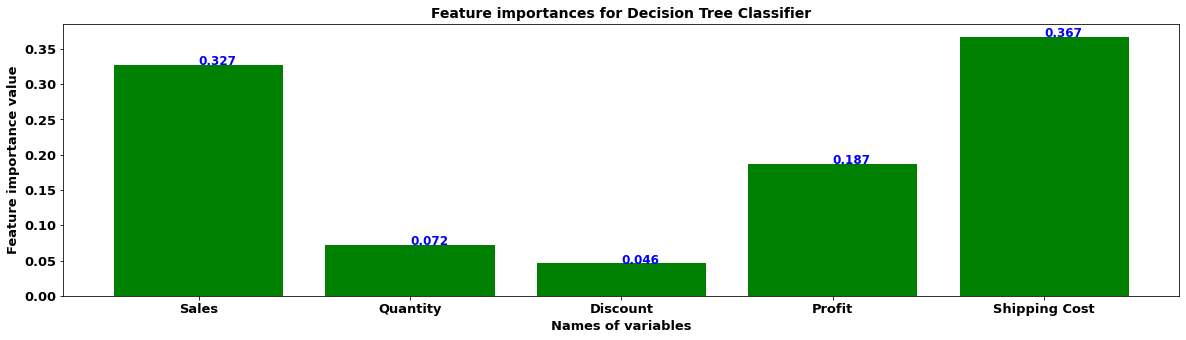

In [ ]:
# Bar plot for feature importances for Decision Tree Classifier
plt.figure(figsize= (20, 5))
feature_importances= dtc.feature_importances_.round(decimals= 3)
plt.bar(features, feature_importances, color= 'green')
for x, y in zip(features, feature_importances ):
  plt.text(x, y, str(y), fontsize= 12, fontweight= 'bold', color= 'blue')
plt.xticks(fontsize= 13, fontweight= 'bold')
plt.yticks(fontsize= 13, fontweight= 'bold')
plt.title('Feature importances for Decision Tree Classifier', fontsize= 14, fontweight= 'bold')
plt.xlabel('Names of variables', fontsize= 13, fontweight= 'bold')
plt.ylabel('Feature importance value', fontsize= 13, fontweight= 'bold')
plt.show()
# Shipping cost has highest feature importance

In [ ]:
# Applying Ada Boost Classifier
ada= AdaBoostClassifier(base_estimator=dtc, n_estimators= 150, learning_rate= 1)
ada.fit(x_train, y_train)
y_pred= ada.predict(x_test)
ada_accuracy= ((accuracy_score(y_test, y_pred)) * 100).round(decimals= 3)
print('Training set accuracy acore % is : ', ((accuracy_score(y_train, ada.predict(x_train))) * 100).round(decimals= 3) )
print('Testing set accuracy acore % is : ', ada_accuracy)
print('Confusion matrix is :', '\n', confusion_matrix(y_test, y_pred))
print()
print('Classification report is :', '\n',  classification_report(y_test, y_pred))

Training set accuracy acore % is :  99.978
Testing set accuracy acore % is :  69.75
Confusion matrix is : 
 [[ 407  356    2   52]
 [ 130 1758   28 1140]
 [   2  254    7  212]
 [  30  867   30 4983]]

Classification report is : 
               precision    recall  f1-score   support

    Critical       0.72      0.50      0.59       817
        High       0.54      0.58      0.56      3056
         Low       0.10      0.01      0.03       475
      Medium       0.78      0.84      0.81      5910

    accuracy                           0.70     10258
   macro avg       0.54      0.48      0.50     10258
weighted avg       0.67      0.70      0.68     10258



In [ ]:
# Comparison of various classifiers
model_names= ['Logistic Regression', 'Decision Tree Classifier', 'Ada Boost Classifier']
accuracies= [lr_accuracy, dtc_accuracy, ada_accuracy]
df= pandas.DataFrame({'Model names': model_names, 'Accuracy scores': accuracies} )
df

,Model names,Accuracy scores
0,Logistic Regression,63.658
1,Decision Tree Classifier,60.353
2,Ada Boost Classifier,69.750


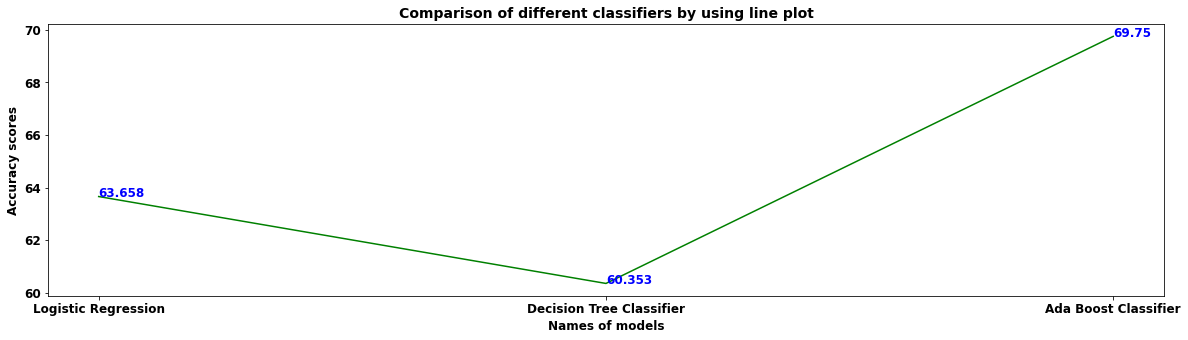

In [ ]:
# Line plot for the comparison of various classifiers
plt.figure(figsize= (20, 5))
plt.plot(df['Model names'], df['Accuracy scores'], color= 'green')
plt.xlabel('Names of models', fontsize= 12, fontweight= 'bold')
plt.ylabel('Accuracy scores', fontsize= 12, fontweight= 'bold')
plt.title('Comparison of different classifiers by using line plot', fontsize= 14, fontweight= 'bold')
plt.xticks(fontsize= 12, fontweight= 'bold')
plt.yticks(fontsize= 12, fontweight= 'bold')
for x, y in zip(df['Model names'], df['Accuracy scores']):
  plt.text(x, y, str(y), fontsize= 12, fontweight= 'bold', color= 'blue')
plt.show()

In [ ]:
# Checking our model prediction accuracy (to confirm) by using values from the dataframe
# Using Ada Boost Classifier due to its high accuracy score
Sales= data['Sales'][900]
Quantity= data['Quantity'][900]
Discount= data['Discount'][900]
Profit= data['Profit'][900]
Shipping_cost= data['Shipping Cost'][900]
input= [[Sales, Quantity, Discount, Profit, Shipping_cost]]
prediction= ada.predict(input)
print('Actual value of target (Order Priority) from the dataframe is :', data['Order Priority'][900] )
print('Predicted value of target (Order Priority) from the model is :', prediction )

Actual value of target (Order Priority) from the dataframe is : Low
Predicted value of target (Order Priority) from the model is : ['Low']


In [ ]:
# Again checking our model prediction accuracy (to confirm) by using values from the dataframe
# Using Ada Boost Classifier due to its high accuracy score
Sales= data['Sales'][1500]
Quantity= data['Quantity'][1500]
Discount= data['Discount'][1500]
Profit= data['Profit'][1500]
Shipping_cost= data['Shipping Cost'][1500]
input= [[Sales, Quantity, Discount, Profit, Shipping_cost]]
prediction= ada.predict(input)
print('Actual value of target (Order Priority) from the dataframe is :', data['Order Priority'][1500] )
print('Predicted value of target (Order Priority) from the model is :', prediction )

Actual value of target (Order Priority) from the dataframe is : Medium
Predicted value of target (Order Priority) from the model is : ['Medium']


In [ ]:
# Checking our model prediction accuracy by using random values
# Using Ada Boost classifier due to its high accuracy score
Sales= 65.85
Quantity= 2
Discount= 0.1
Profit= 3.15
Shipping_cost= 10.52
input= [[Sales, Quantity, Discount, Profit, Shipping_cost]]
prediction= ada.predict(input)
print('Predicted value of target (Order Priority) from the model is :', prediction )

Predicted value of target (Order Priority) from the model is : ['High']


In [ ]:
from termcolor import colored
print( colored('Thank you for reading this.', 'green', attrs= ['bold'] ) ) 

Thank you for reading this.
